## 0. Import library
<hr>
Import library

In [2]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-02.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

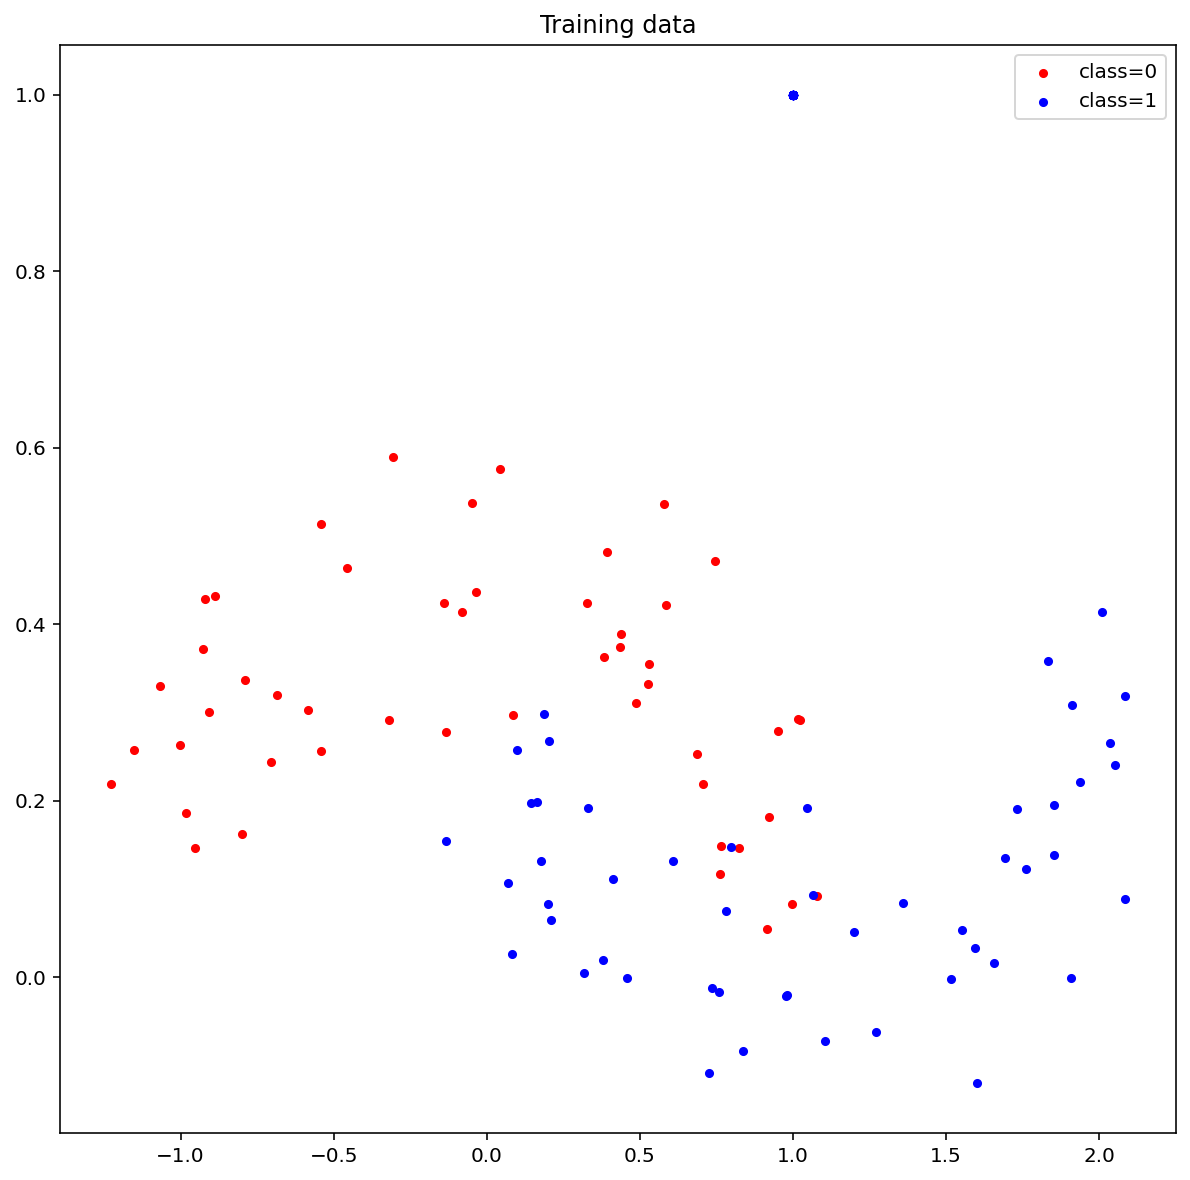

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

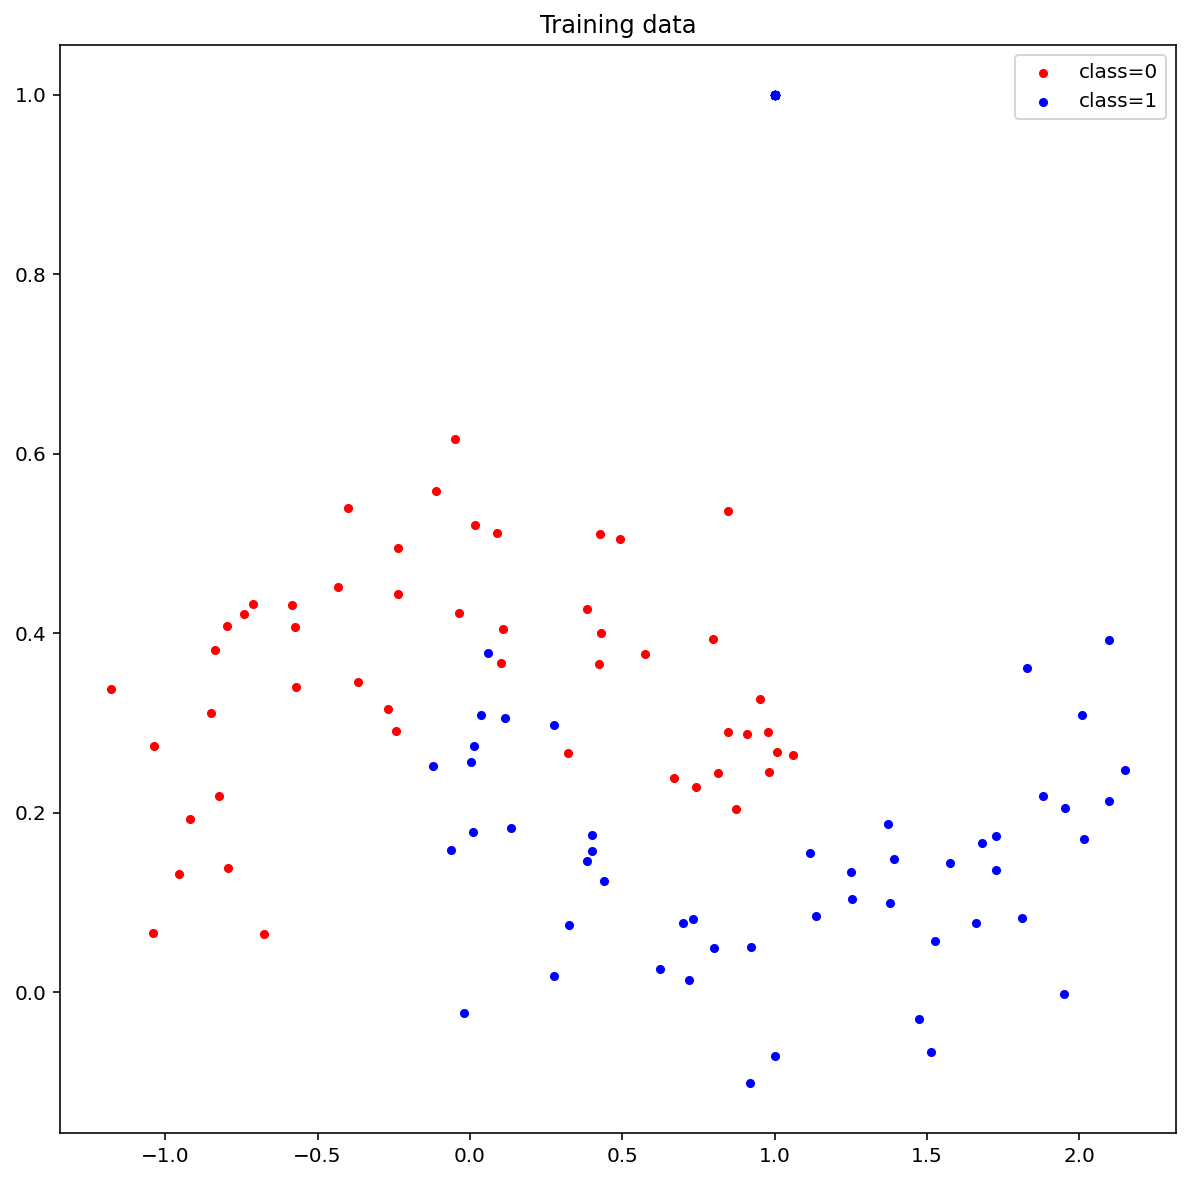

In [9]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

In [10]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    a = 1-y_pred
    loss = (-y.T.dot(np.log(y_pred)) - (1-y.T).dot(np.log(a))) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = (X.T.dot(y_pred-y) * 2) / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, w) # linear predicition function   
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred, y) # save the current loss value 
        
    return w, L_iters

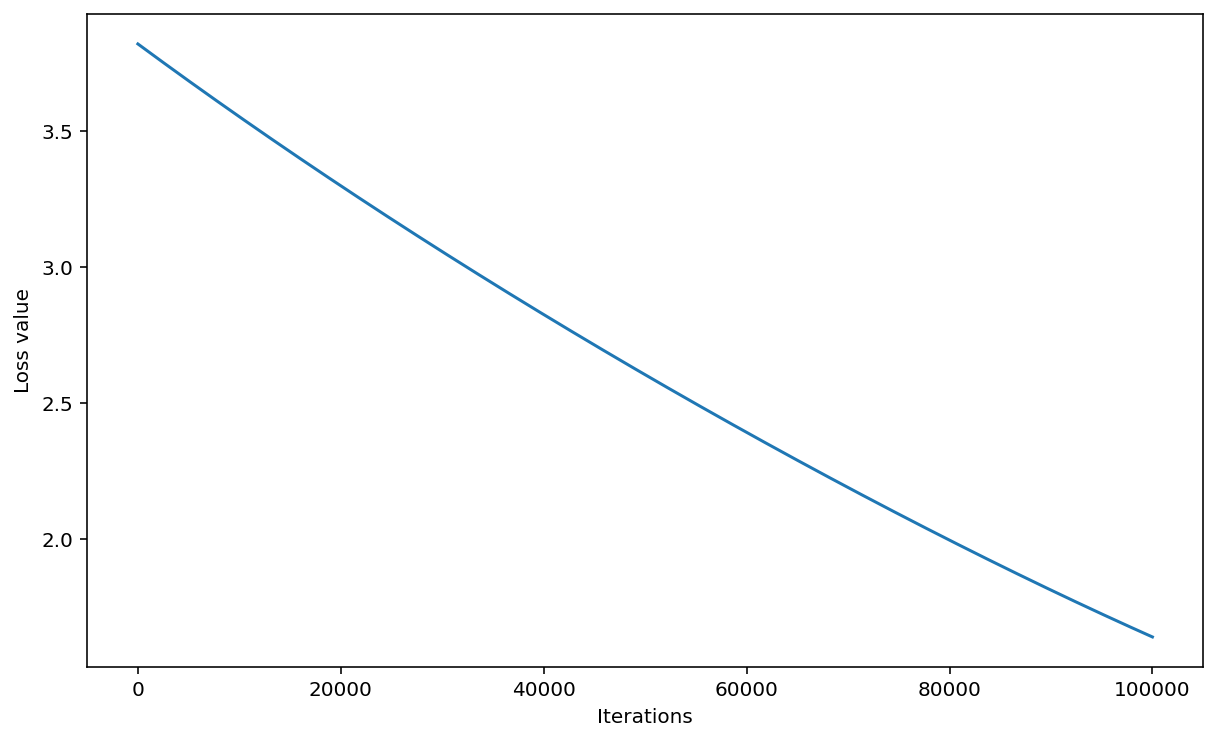

In [13]:
# construct the data matrix X, and label vector y
train_n = data_train.shape[0]
train_X = np.ones([train_n,5])
train_X[:,0] = np.power(data_train[:,0],3)
train_X[:,1] = np.power(data_train[:,0],2)
train_X[:,2] = data_train[:,0]
train_X[:,3] = data_train[:,1]


train_y = data_train[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
w_init = np.array([0, 0, 0, 0,  0])[:,None]
tau = 1e-5; max_iter = 100000
w, L_iters = grad_desc(train_X, train_y, w_init, tau, max_iter)
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()